# Analyse des Transactions Frauduleuses pour la Prévention du Blanchiment d'Argent

## À propos du projet
Ce projet a pour objectif d'étudier les transactions financières suspectes dans un contexte global à l'aide d'un ensemble de données spécifiques disponible [ici](https://www.kaggle.com/datasets/waqi786/global-black-money-transactions-dataset/data).  Grâce à une analyse statistique approfondie, nous chercherons à identifier les schémas récurrents et les facteurs qui facilitent le blanchiment d'argent. Les résultats permettront de prédire les transactions frauduleuses et d'évaluer les régions, secteurs d'activité et pays de destination qui sont les plus vulnérables à ces pratiques illégales.

## Objectifs de l'étude
L'étude portera principalement sur les axes suivants :

- L'identification des transactions frauduleuses : Grâce à l'analyse des scores de risque de blanchiment d'argent, nous chercherons à identifier des modèles récurrents de fraude.
- L'analyse géographique : Déterminer les pays les plus utilisés pour le blanchiment d'argent, tant en termes de pays de transaction que de pays de destination ou de paradis fiscal.
- L'analyse sectorielle : Identifier les secteurs d'activité les plus utilisés pour les transactions illicites.

## Outils
Pour mener à bien cette étude, nous allons utiliser Python ainsi que ses principales bibliothèques pour l'analyse de données et la visualisation.Entre autres, nous aurons besoin de Pandas pour la manipulation et l'analyse des données, NumPy pour les calculs numériques, Matplotlib et Seaborn pour la visualisation des données sous forme de graphiques et de diagrammes.

## Contenu 
Cette base de données contient des transactions financières détaillées, y compris des informations telles que l'ID de transaction, le pays d'origine, le montant (en USD), le type de transaction, la date, les personnes impliquées, l'industrie, le pays de destination, l'autorité qui a signalé la transaction, la source d'argent, le score de risque de blanchiment d'argent, l'implication de sociétés fictives, l'institution financière et le pays considéré comme un paradis fiscal.

#### Remarque : 
On considerera tout score de risque de blanchiment d'argent **Money Laundering Risk Score** >= 5 comme transaction frauduleuse.



## Preparation des données
#### Chargement des bibliothèques

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
from plotly import graph_objects as go
import warnings

#### Chargement des données

In [2]:
df = pd.read_csv('C:/Users/Lenovo i5/Downloads/archive (2)/Big_Black_Money_Dataset.csv')

#### Suppression des avertissements

In [88]:
warnings.filterwarnings("ignore")

#### Analyse du Dataframe

In [3]:
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [8]:
df.isnull().sum()

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

In [9]:
print(df.dtypes)

Transaction ID                         object
Country                                object
Amount (USD)                          float64
Transaction Type                       object
Date of Transaction            datetime64[ns]
Person Involved                        object
Industry                               object
Destination Country                    object
Reported by Authority                    bool
Source of Money                        object
Money Laundering Risk Score             int64
Shell Companies Involved                int64
Financial Institution                  object
Tax Haven Country                      object
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [4]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

In [16]:
df.dtypes

Transaction ID                         object
Country                                object
Amount (USD)                          float64
Transaction Type                       object
Date of Transaction            datetime64[ns]
Person Involved                        object
Industry                               object
Destination Country                    object
Reported by Authority                    bool
Source of Money                        object
Money Laundering Risk Score             int64
Shell Companies Involved                int64
Financial Institution                  object
Tax Haven Country                      object
dtype: object

In [5]:
# Afficher les valeurs uniques pour une colonne donnée (par exemple 'Country')
df.nunique()

Transaction ID                 10000
Country                           10
Amount (USD)                   10000
Transaction Type                   5
Date of Transaction            10000
Person Involved                 6320
Industry                           7
Destination Country               10
Reported by Authority              2
Source of Money                    2
Money Laundering Risk Score       10
Shell Companies Involved          10
Financial Institution            499
Tax Haven Country                  6
dtype: int64

In [90]:
df.duplicated().sum()

0

Après Analyse de notre Dataframe, il en ressort que nous n'avons pas de valeurs dupliquées et nulles. Notre Base de donnée est operationnelle. Nous pouvons maintenant commencer notre etude sur les transactions financieres frauduleuses.

### Data Visualization

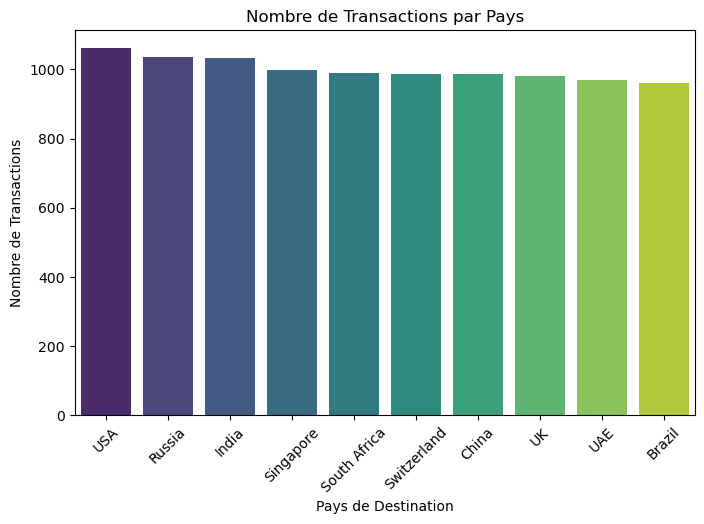

In [38]:
# Moyenne des transactions par pays
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Destination Country', order=df['Destination Country'].value_counts().index, palette='viridis')
plt.title('Nombre de Transactions par Pays')
plt.xlabel('Pays de Destination')
plt.ylabel('Nombre de Transactions')
plt.xticks(rotation=45)
plt.show()

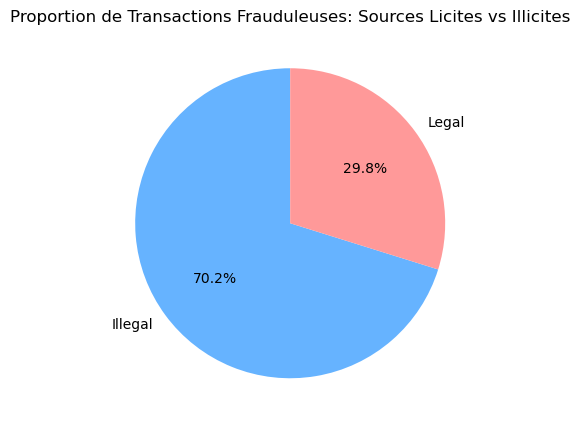

In [51]:
# Filtre des transactions frauduleuses (avec un score de risque >= 5)
fraudulent_transactions = df[df['Money Laundering Risk Score'] >= 5]

# Decompte du nombre de transactions frauduleuses par source d'argent (licite vs illicite)
fraud_by_source = fraudulent_transactions['Source of Money'].value_counts()

# Visualisation des résultats avec un diagramme circulaire (pie chart)
plt.figure(figsize=(5, 6))
plt.pie(fraud_by_source, labels=fraud_by_source.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proportion de Transactions Frauduleuses: Sources Licites vs Illicites')
plt.show()

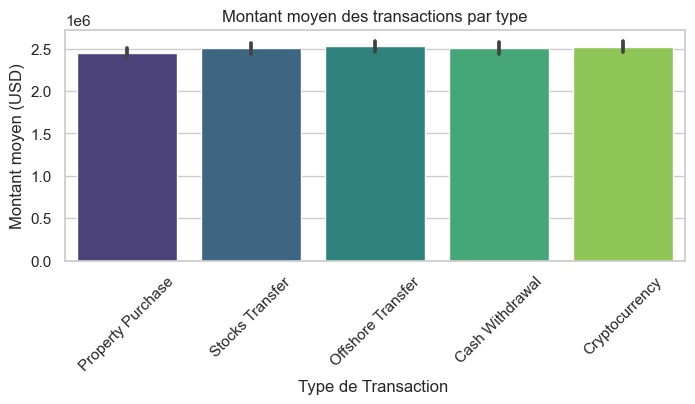

In [101]:
# Moyenne des transactions
plt.figure(figsize=(8, 3))
sns.barplot(data=df, x='Transaction Type', y='Amount (USD)', estimator=np.mean, palette='viridis', order=df['Transaction Type'].value_counts().index)
plt.title('Montant moyen des transactions par type')
plt.xlabel('Type de Transaction ')
plt.ylabel('Montant moyen (USD)')
plt.xticks(rotation=45)
plt.show()

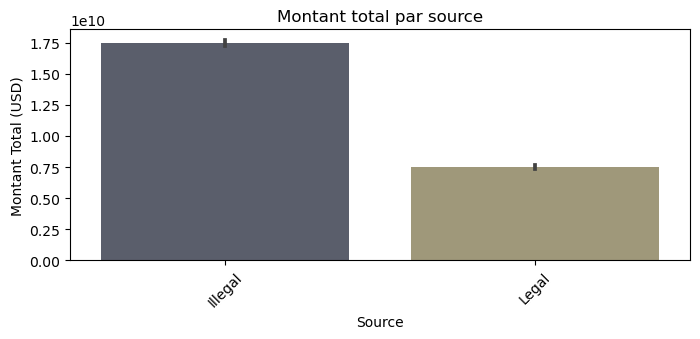

In [36]:
# Montant total par source d'argent (legal vs illegal)
plt.figure(figsize=(8, 3))
sns.barplot(data=df, x='Source of Money', y='Amount (USD)', estimator=np.sum, palette='cividis', order=df['Source of Money'].value_counts().index)
plt.title('Montant total par source')
plt.xlabel('Source')
plt.ylabel('Montant Total (USD)')
plt.xticks(rotation=45)
plt.show()

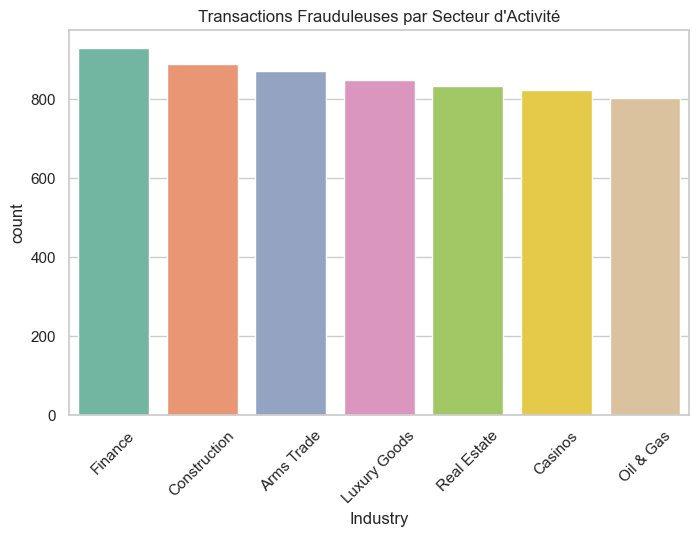

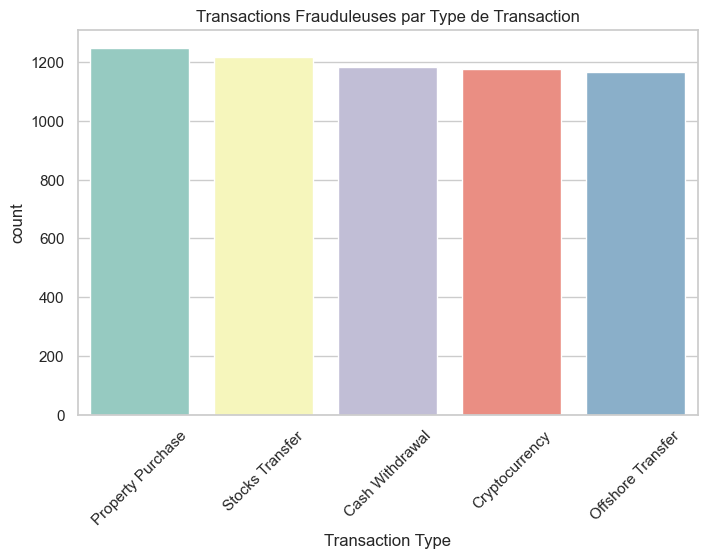

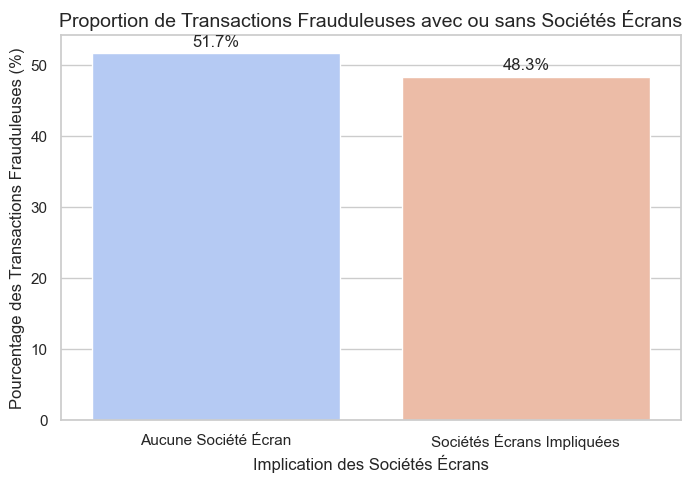

In [99]:
# Filtre des transactions frauduleuses (avec un score de risque >= 5)
fraudulent_transactions = df[df['Money Laundering Risk Score'] >= 5]

# Visualisation 1: Distribution des transactions frauduleuses par industrie
plt.figure(figsize=(8, 5))
sns.countplot(data=fraudulent_transactions, x='Industry', order=fraudulent_transactions['Industry'].value_counts().index, palette='Set2')
plt.title('Transactions Frauduleuses par Secteur d\'Activité')
plt.xticks(rotation=45)
plt.show()


# Visualisation 2: Distribution des transactions frauduleuses par type de transaction
plt.figure(figsize=(8, 5))
sns.countplot(data=fraudulent_transactions, x='Transaction Type', order=fraudulent_transactions['Transaction Type'].value_counts().index, palette='Set3')
plt.title('Transactions Frauduleuses par Type de Transaction')
plt.xticks(rotation=45)
plt.show()


# Filtre des transactions frauduleuses ( avec un score de risque >= 5)
fraudulent_transactions = df[df['Money Laundering Risk Score'] >= 5]

# Création d'un dictionnaire pour mapper les valeurs 0 et 1 à des descriptions plus explicites
fraudulent_transactions['Shell Companies Involved'] = fraudulent_transactions['Shell Companies Involved'].map({0: 'Aucune Société Écran', 1: 'Sociétés Écrans Impliquées'})

# Décompte du nombre de transactions frauduleuses avec ou sans sociétés écrans
shell_counts = fraudulent_transactions['Shell Companies Involved'].value_counts(normalize=True) * 100

# Visualisation améliorée avec pourcentages
plt.figure(figsize=(8, 5))
sns.barplot(x=shell_counts.index, y=shell_counts.values, palette='coolwarm')

# Ajout des pourcentages sur les barres
for i, value in enumerate(shell_counts.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12,)

# Ajout des titres et labels
plt.title('Proportion de Transactions Frauduleuses avec ou sans Sociétés Écrans', fontsize=14)
plt.ylabel('Pourcentage des Transactions Frauduleuses (%)')
plt.xlabel('Implication des Sociétés Écrans')

# Afficher le graphique
plt.show()

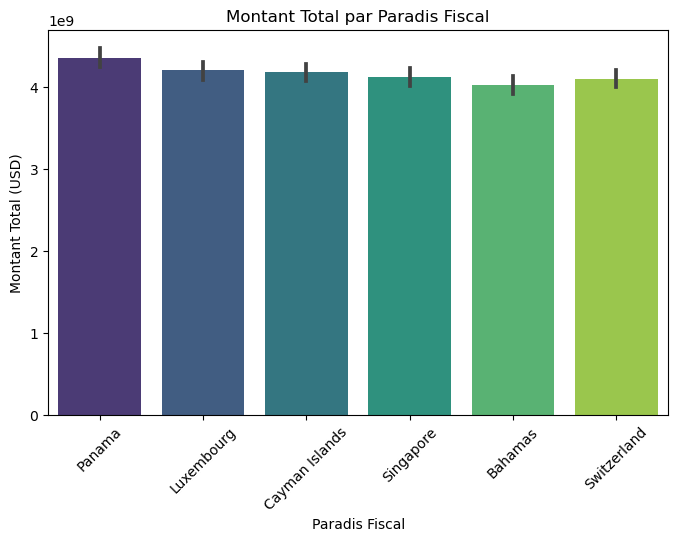

In [43]:
# Montant total par Paradis Fiscal
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Tax Haven Country', y='Amount (USD)', estimator=np.sum, palette='viridis', order=df['Tax Haven Country'].value_counts().index)
plt.title('Montant Total par Paradis Fiscal')
plt.xlabel('Paradis Fiscal')
plt.ylabel('Montant Total (USD)')
plt.xticks(rotation=45)
plt.show()

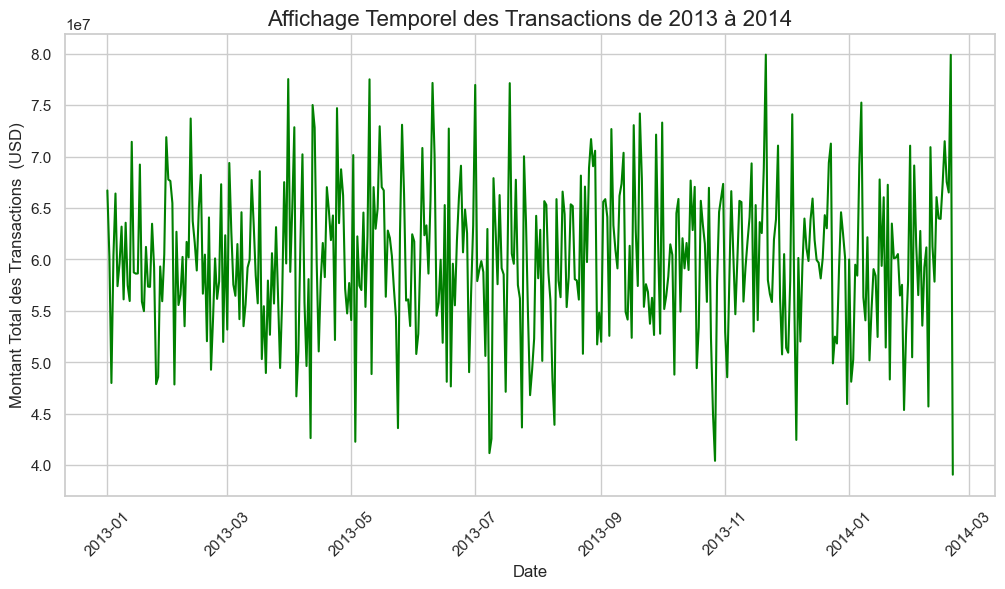

In [85]:
# Agrégation des données pour le tracé d'une série chronologique
df['Date'] = pd.to_datetime(df['Date of Transaction']).dt.date
time_series_data = df.groupby('Date')['Amount (USD)'].sum().reset_index()

# Tracé des series temporelle
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount (USD)', data=time_series_data, color='green')
plt.title('Affichage Temporel des Transactions de 2013 à 2014', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Montant Total des Transactions  (USD)')
plt.xticks(rotation=45)
plt.show()

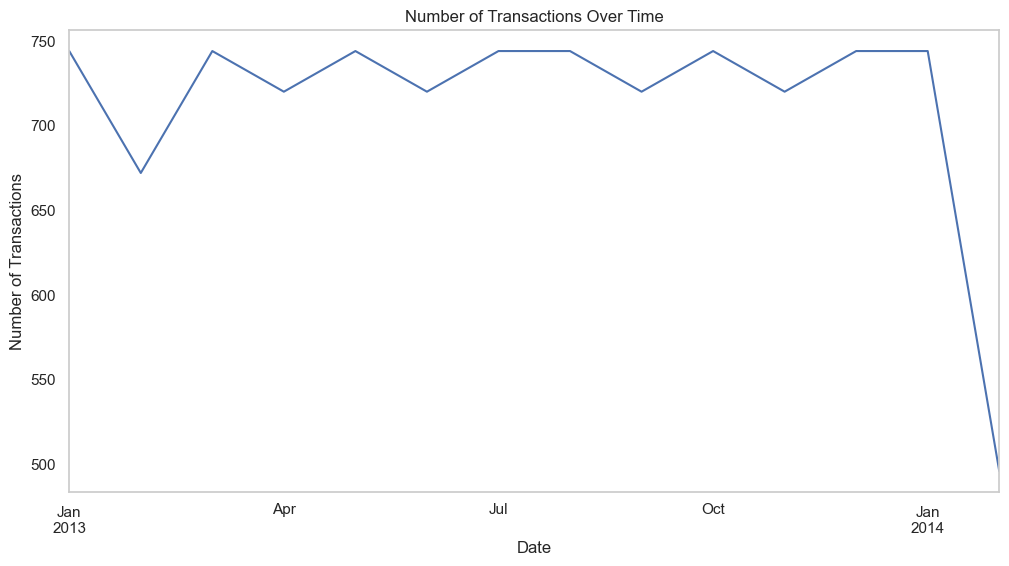

In [96]:
# Convert Date of Transaction to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Plot transactions over time
plt.figure(figsize=(12, 6))
df.set_index('Date of Transaction').resample('M').size().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

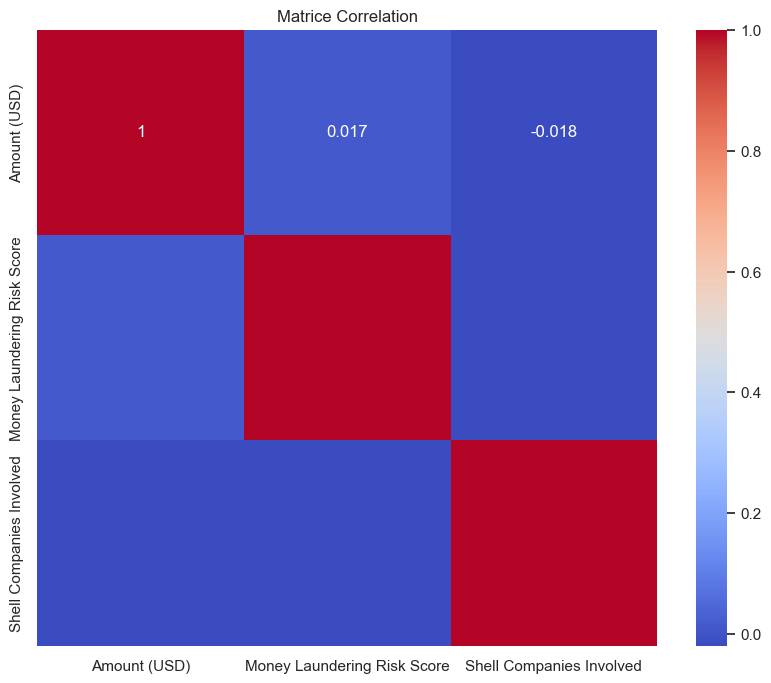

In [102]:
numeric_df = df.select_dtypes(include=[np.number])

# matrice de Correlation 
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice Correlation')
plt.show()

### Probleme rencontré
Nous avons rencontré un problème d'affichage des données de notre matrice de correlation sur notre Notebook. Nous joindrons donc une photo de notre Matrice de correlation. 

![Capture d’écran 2024-09-27 195941](https://github.com/user-attachments/assets/36ef8cf3-5ee2-4664-8570-22c3b70d7e55)


## Conclusion

Au regard de cette étude, à travers l'analyse des graphiques, nous pouvons conclure que :
- Notre matrice de correlation montre que les variables étudiées ne sont pas fortement corrélées entre elles car les valeurs sont proches de zéro. Ce qui signifie que les relations entre ces variables sont faibles ou inexistantes.
- La plupart des transactions frauduleuses sont issues d'argent illégal representant plus de 60% du total.
- Les transactions sont effectuées aussi par des sociétés ecrans que de facon directe, ce qui laisse penser qu'on ne peut pas conclure que les societés ecrans sont la source majeure du blanchiment d'argent.
- On observe une stabilité temporelle avec des variations mineures. Cependant, nous remarquons une forte baisse du nombre de transactions en 2014, cela pourrait néccessiter une analyse plus poussée pour en connaître les raisons de cette baisse considérable du nombre de transactions entre janvier 2013 et janvier 2014.
- En ce qui concerne les secteurs d'activités liés au blanchiment d'argent, en tête, nous avons le secteur des finances qui est légèrement au-dessus des autres secteurs qui sont aussi une source non négligeable de ce fléau.
- Par ailleurs, les Paradis Fiscaux (Pays) sont tous sollicités par les fraudeurs principalement à cause de leur faible taux d'impôts, avec en tête le Panama. Ces pays devraient donc améliorer les contrôles au niveau de leur fiscalité et collaborer avec les institutions internationales afin d'intercepter les transactions frauduleuses qui causent d'énormes pertes aux portefeuilles budgétaires de nos États. Les États à partir desquels sont effectuées ces transactions frauduleuses doivent renforcer les contrôles au niveau des transactions financières et sanctionner durement les fraudeurs, de sorte à dissuader d'éventuels fraudeurs.
  